# NAIVE DIVERSIFICATION - EQUALLY WEIGHTED PORTFOLIO

In [27]:
import numpy as np
import pandas as pd
import quantstats as qs
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import random

In [28]:
stocks = ["SBIN.NS" , "HEROMOTOCO.NS" , "ADANIPOWER.NS" , "AAPL" , "GOOG"]

In [29]:
end_date = dt.datetime(2023,12,31)
start_date = end_date - dt.timedelta(days=1000)

In [30]:
w = len(stocks) * [1/len(stocks)]
print(w)

[0.2, 0.2, 0.2, 0.2, 0.2]


In [31]:
data = yf.download(stocks,
                   start=start_date,
                   end=end_date)
data1=data.copy(deep=True)

[                       0%%                      ]

C:\Users\RONIT KUMAR LENKA\anaconda3\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\RONIT KUMAR LENKA\anaconda3\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\RONIT KUMAR LENKA\anaconda3\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\RONIT KUMAR LENKA\anaconda3\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecat

[*********************100%%**********************]  5 of 5 completed


C:\Users\RONIT KUMAR LENKA\anaconda3\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [32]:
Adj_close = data1["Adj Close"]

In [33]:
returns = np.log(Adj_close/Adj_close.shift(1))
returns=returns.dropna()
print(returns.head())

                AAPL  ADANIPOWER.NS      GOOG  HEROMOTOCO.NS   SBIN.NS
Date                                                                  
2021-04-06  0.002459       0.048409 -0.000359       0.000364 -0.008522
2021-04-07  0.013301       0.015629  0.011143       0.018407  0.022565
2021-04-08  0.019051      -0.025844  0.006981      -0.004634 -0.008262
2021-04-09  0.020049       0.002563  0.008982      -0.005171 -0.007338
2021-04-12 -0.013321      -0.050943 -0.013694      -0.044506 -0.070866


In [34]:
Portfolio_retrns = np.sum(w*returns,axis=1)
print(Portfolio_retrns)

Date
2021-04-06    0.008470
2021-04-07    0.016209
2021-04-08   -0.002541
2021-04-09    0.003817
2021-04-12   -0.038666
                ...   
2023-12-22    0.002741
2023-12-26    0.006233
2023-12-27    0.005429
2023-12-28    0.006749
2023-12-29   -0.005429
Length: 603, dtype: float64


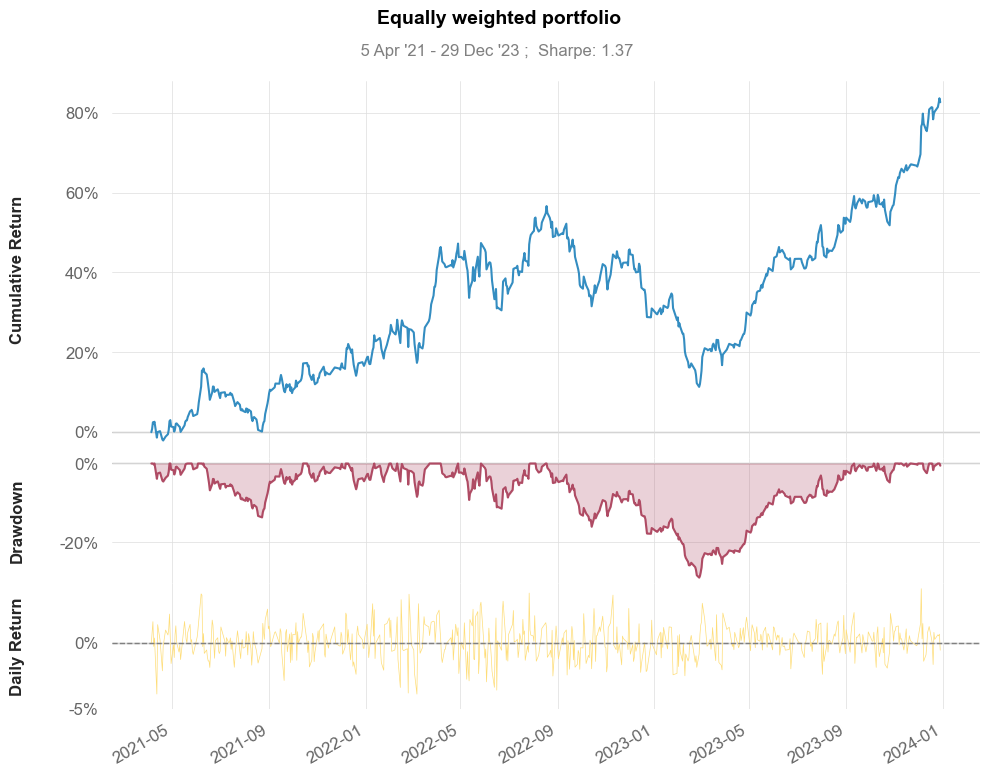

In [35]:
qs.plots.snapshot(Portfolio_retrns,
                  title="Equally weighted portfolio")

In [36]:
qs.reports.metrics(Portfolio_retrns,
                   benchmark="^NSEI",
                   mode="basic",
                   prepare_returns=False)

[*********************100%%**********************]  1 of 1 completed

C:\Users\RONIT KUMAR LENKA\anaconda3\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


C:\Users\RONIT KUMAR LENKA\anaconda3\Lib\site-packages\quantstats\stats.py:510: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns = _utils._prepare_returns(returns, rf).resample(resolution).sum()


                    Benchmark (^NSEI)    Strategy
------------------  -------------------  ----------
Start Period        2021-04-06           2021-04-06
End Period          2023-12-29           2023-12-29
Risk-Free Rate      0.0%                 0.0%
Time in Market      100.0%               100.0%

Cumulative Return   48.0%                81.1%
CAGR﹪              10.42%               16.2%

Sharpe              1.19                 1.36
Prob. Sharpe Ratio  96.4%                98.19%
Sortino             1.68                 2.04
Sortino/√2          1.19                 1.44
Omega               1.25                 1.25

Max Drawdown        -16.97%              -28.91%
Longest DD Days     400                  386

Gain/Pain Ratio     0.22                 0.25
Gain/Pain (1M)      1.2                  1.32

Payoff Ratio        0.94                 0.98
Profit Factor       1.22                 1.25
Common Sense Ratio  1.17                 1.33
CPC Index           0.64                 0.67


# OPTIMUM DIVERSIFICATION - WEIGHTS DERIVED FROM MARKOWITZ EFFICIENT FRONTIER

### GENERATE WEIGHTS AND CALCULATE MEAN,SD AND SHARPE RATIO 

In [39]:
Num_portfolio = 10000
portfolio_retrn=[]
portfolio_sd=[]
weights =[]
S=[]
rfr=0.02
results=np.zeros((3,Num_portfolio))
for i in range(0,Num_portfolio):
    w=np.random.random(len(stocks))
    w=w/np.sum(w)

    mean = np.sum(w*returns.mean()*252)
    portfolio_retrn.append(mean)
    sd = (np.dot(w.T,np.dot(returns.cov()*252,w)))**(1/2)
    portfolio_sd.append(sd)
    weights.append(w)

    Sharpe_ratio = (mean-rfr)/sd
    S.append(Sharpe_ratio)

    results[0,i]=mean
    results[1,i]=sd
    results[2,i]=Sharpe_ratio   

In [40]:
Sharpe_max_loc=np.argmax(results[2,:])
w_max_Sharpe = weights[Sharpe_max_loc]

print("The Weights at which Sharpe Ratio is maximum are", w_max_Sharpe , "and are the Efficient weights in our optimization Exercise")

The Weights at which Sharpe Ratio is maximum are [0.22376129 0.20564413 0.02059151 0.01501511 0.53498796] and are the Efficient weights in our optimization Exercise


### PLOTTING THE EFFICIENT FRONTIER, CML and THE TANGENCY PORTFOLIO

In [42]:
data2=pd.DataFrame()
data2["Return"]=portfolio_retrn
data2["Risk"]=portfolio_sd
data2["Sharpe_Ratio"]=S

eff_risk = portfolio_sd[Sharpe_max_loc]
eff_retrn =  portfolio_retrn[Sharpe_max_loc]
R = np.arange(0,0.3,0.01)
sml = rfr + ((eff_retrn-rfr)/eff_risk)*R

In [86]:
w1=np.array(w)
equal_returns = np.dot(w1,returns.mean()*252)
equal_sd = (np.dot(w1.T,np.dot(returns.cov()*252,w1)))**(1/2)

0.27944706144671355 0.20969614388665775


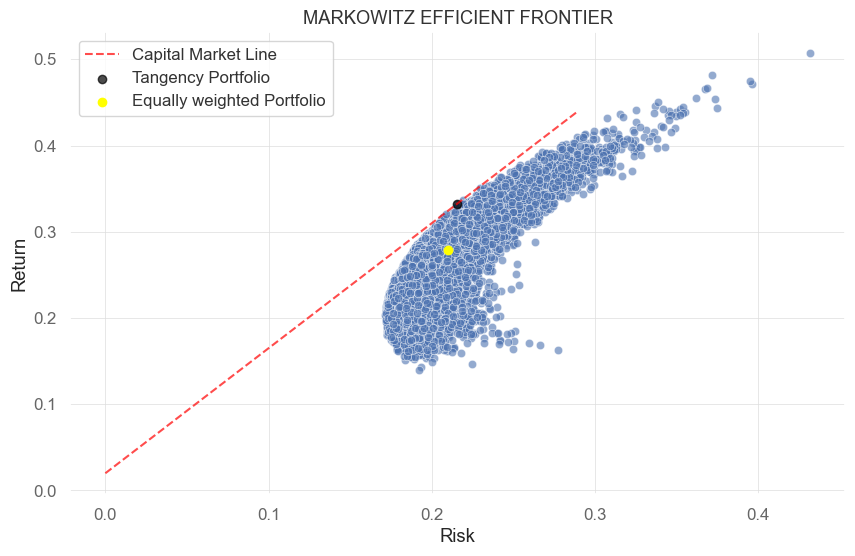

In [92]:
sns.scatterplot(data=data2,x=data2["Risk"],y=data2["Return"],alpha=0.6)
sns.lineplot(x=R,y=sml,label="Capital Market Line",color='red',alpha=0.7,linestyle="--")
plt.scatter(x=eff_risk,y=eff_retrn,color='black',label="Tangency Portfolio",alpha=0.7)
plt.scatter(x=equal_sd,y=equal_returns,color='yellow',label="Equally weighted Portfolio")
plt.legend()
plt.title("MARKOWITZ EFFICIENT FRONTIER")
plt.savefig("MPT.png")

## COMPARING THE EFFICIENT PORTFOLIO WITH THE BENCHMARK

In [45]:
eff_returns=np.sum(w_max_Sharpe*returns,axis=1)

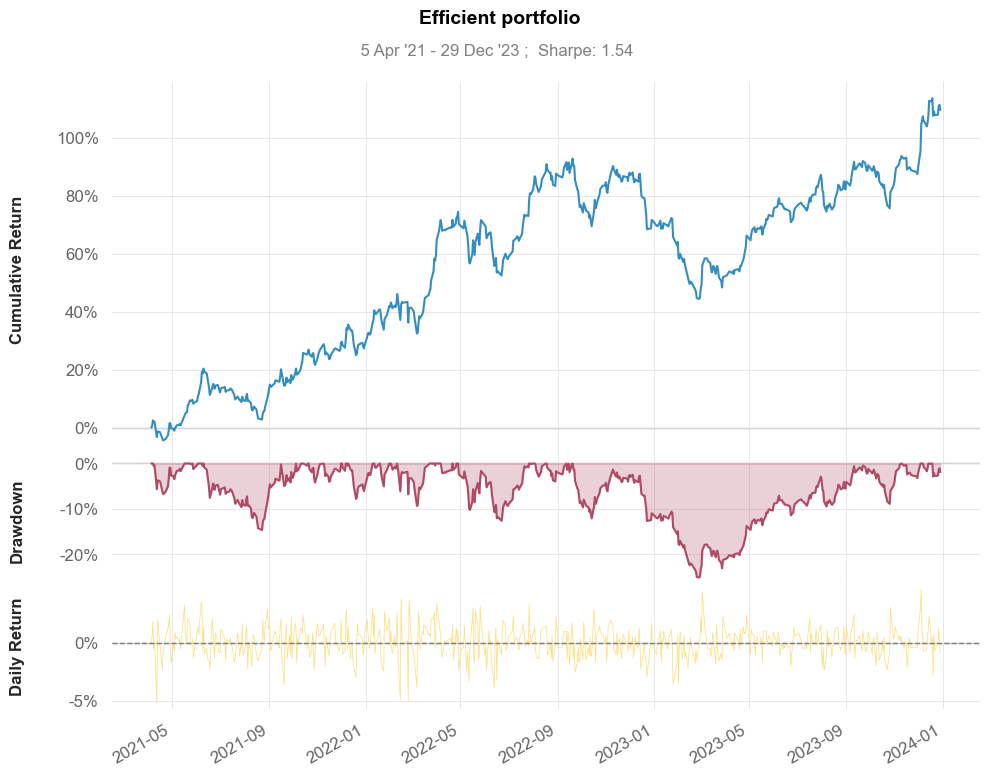

In [46]:
qs.plots.snapshot(eff_returns,
                  title="Efficient portfolio")

In [47]:
qs.reports.metrics(eff_returns,
                   benchmark="^NSEI",
                   mode="basic",
                   prepare_returns=False)

[*********************100%%**********************]  1 of 1 completed

C:\Users\RONIT KUMAR LENKA\anaconda3\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


C:\Users\RONIT KUMAR LENKA\anaconda3\Lib\site-packages\quantstats\stats.py:510: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns = _utils._prepare_returns(returns, rf).resample(resolution).sum()


                    Benchmark (^NSEI)    Strategy
------------------  -------------------  ----------
Start Period        2021-04-06           2021-04-06
End Period          2023-12-29           2023-12-29
Risk-Free Rate      0.0%                 0.0%
Time in Market      100.0%               100.0%

Cumulative Return   48.0%                108.4%
CAGR﹪              10.42%               20.39%

Sharpe              1.19                 1.53
Prob. Sharpe Ratio  96.4%                99.05%
Sortino             1.68                 2.29
Sortino/√2          1.19                 1.62
Omega               1.29                 1.29

Max Drawdown        -16.97%              -25.12%
Longest DD Days     400                  415

Gain/Pain Ratio     0.22                 0.29
Gain/Pain (1M)      1.2                  1.62

Payoff Ratio        1.0                  1.04
Profit Factor       1.22                 1.29
Common Sense Ratio  1.17                 1.5
CPC Index           0.68                 0.73